# Part IX: Python Language Internals <a id="9-language-internals"></a>

1. [Namespaces and Scope](#namespaces-and-scope)
    - [Global and Local Variables](#global-and-local-variables)
    - [Modules and Packages](#modules-and-packages)
    - [Built-in Names](#built-in-names)
    - [LEGB Rule](#legb-rule)
2. [Typing](#typing)
    - [Type Hints](#type-hints)
    - [Type Checking](#type-checking)
        - [Dynamic Type Checking](#dynamic-type-checking)
        - [Static Type Checking](#static-type-checking)
    - [Protocols](#protocols)
3. [Python Compilation](#python-compilation)
    - [Python Interpreter](#python-interpreter)
    - [Bytecode](#bytecode)
    - [Python Virtual Machine](#python-virtual-machine)
4. [Memory Management](#memory-management)
    - [Heap and Stack](#heap-and-stack)
    - [Memory Allocation](#memory-allocation)
    - [Garbage Collection](#garbage-collection)
        - [Reference Counting](#reference-counting)
        - [GC debug and objgraph](#gc-debug-objgraph)
5. [Introspection](#introspection)

## 1. Namespaces and Scope <a id="namespaces-and-scope"></a>

In Python, a namespace is a mapping from names to objects. It is used to avoid name conflicts and to provide a way to access objects in a program. Python uses a hierarchical namespace system, which allows for the creation of nested namespaces.

### Global and Local Variables <a id="global-and-local-variables"></a>

In Python, variables are categorized as either global or local, based on where they are declared and the scope in which they can be accessed and modified.

**Global Variables**:

- **Declaration**: A variable declared outside of any function or class is considered a global variable.
- **Scope**: Global variables can be accessed and modified from anywhere in the program, including inside functions and classes.
- **Lifetime**: Global variables exist for the entire duration of the program's execution.

**Local Variables**:

- **Declaration**: A variable declared inside a function or class method is considered a local variable.
- **Scope**: Local variables can only be accessed and modified within the function or method in which they are declared.
- **Lifetime**: Local variables exist only for the duration of the function or method's execution.

In [25]:
x = 5  # Global variable


def modify_variables():
    y = 10  # Local variable
    global x
    x = x + 1  # Modifies the global variable
    print("Inside function, global x:", x)
    print("Inside function, local y:", y)


modify_variables()
print("Outside function, global x:", x)

# Trying to access y outside the function will raise an error
# print(y)  # Uncommenting this line will result in NameError

Inside function, global x: 6
Inside function, local y: 10
Outside function, global x: 6


### Modules and Packages <a id="modules-and-packages"></a>

In Python, a module is a file containing Python definitions and statements. The file name is the module name with the suffix `.py` appended. A package is a collection of modules in directories that have a special file called `__init__.py`.

**Modules**:
- **Functionality**: Modules are used to organize Python code into reusable units. They can contain functions, classes, and variables, and can be imported into other modules or scripts.
- **Importing**: Modules can be imported using the `import` statement, which allows the code in the module to be accessed and used in the importing module.
- **Namespace**: Each module has its own namespace, which means that the names defined in a module are separate from the names defined in other modules.

**Packages**:
- **Functionality**: Packages are a way of organizing related modules into a single directory hierarchy. They provide a way to create a namespace for the modules they contain.
- **Importing**: Packages can be imported using the `import` statement, and the modules within the package can be accessed using dot notation.
- **Namespace**: Packages have their own namespace, and the modules within the package have their own namespaces as well.

Suppose you have a directory structure like this for a package named `mypackage`:
```markdown
mypackage/
│
├── __init__.py
├── module1.py
└── module2.py
```

- `module1.py` might define a function `function_a`.
- `module2.py` might define a function `function_b`.

Using Modules and Packages
```python
# Importing a module from the package
from mypackage import module1
module1.function_a()

# Importing a specific function from a module
from mypackage.module2 import function_b
function_b()

# Importing the entire module
import mypackage.module1 as mod1
mod1.function_a()
```

### Built-in Names <a id="built-in-names"></a>

_Built-in names_ in Python refer to a pre-defined set of objects, functions, exceptions, and other entities that are always available in any Python environment. These built-ins are part of the Python language core and provide fundamental functionality that you can use without needing to import any modules.

_Examples of Built-in Names:_

1. **Built-in Functions**: Functions like `print()`, `len()`, `type()`, and `range()` are built-in functions that perform common tasks.
2. **Built-in Data Types**: Python includes built-in data types like `int`, `float`, `str`, `list`, `tuple`, `dict`, `set`, and `bool`.
3. **Built-in Exceptions**: Exceptions like `ValueError`, `TypeError`, `IndexError`, `KeyError`, and `OSError` are built-in exceptions that you can catch and handle in your code.
4. **Built-in Constants**: Constants like `True`, `False`, `None`, `NotImplemented`, `Ellipsis`, and numerical constants like `float('inf')` and `float('-inf')`.

In [26]:
# Using built-in functions
numbers = [1, 2, 3, 4, 5]
print(len(numbers))  # Prints the length of the list

# Using built-in data types
name = str("John Doe")  # Creates a string object
age = int(30)  # Creates an integer object

# Handling built-in exceptions
try:
    value = numbers[5]  # Attempt to access an index that does not exist
except IndexError as e:
    print("That index does not exist:", e)

# Using built-in constants
if name is not None:
    print(name)

5
That index does not exist: list index out of range
John Doe


### LEGB Rule <a id="legb-rule"></a>

The _LEGB rule_ is a set of rules used by Python to determine the order in which it searches for names in the program. The acronym LEGB stands for Local, Enclosing, Global, and Built-in, which are the four scopes in which Python searches for names.

When a name is used, Python searches these four scopes in the order described by LEGB to find the first place where the name is defined. Once found, Python uses the corresponding object. If the name is not found in any of these scopes, a `NameError` is raised.

**LEGB Scopes**:

1. **Local (L)**: This is the innermost scope, which includes names defined in the current function or lambda expression.
2. **Enclosing (E)**: This scope is used for nested functions. It includes names defined in the enclosing function (outer function) of the current function.
3. **Global (G)**: This scope includes names defined at the top level of the module or script, or declared global in a function.
4. **Built-in (B)**: This is the outermost scope, which includes names pre-defined in the built-in namespace.

In [27]:
x = "global x"  # Global scope


def outer():
    x = "outer x"  # Enclosing scope

    def inner():
        # x = 'inner x'  # Uncomment to see how local scope takes precedence
        print(
            x
        )  # Python looks for 'x' in the Local, Enclosing, Global, then Built-in scopes

    inner()


outer()

outer x


## 2. Typing <a id="typing"></a>

Python is a dynamically typed language, which means that the type of a variable is determined at runtime. However, Python 3.5 introduced a new module called `typing` that allows you to specify the type of variables, function arguments, and return values. This is known as type hinting.

### Type Hints <a id="type-hints"></a>

_Type hints_ are a way to specify the expected types of variables, function arguments, and return values in Python code. They are used to provide additional information to developers, tools, and libraries about the types of data that are expected and returned by functions and methods.

Type hints are not enforced by the Python interpreter, which means that they do not affect the runtime behavior of the code. However, they can be used by static type checkers, IDEs, and other tools to provide better code analysis, error checking, and documentation.

**Syntax for Type Hints**:

- **Variable Type Hints**: `variable_name: type`
- **Function Argument Type Hints**: `def function_name(arg1: type, arg2: type) -> return_type:`
- **Return Type Hints**: `def function_name() -> return_type:`
- **Type Aliases**: `NewType('TypeName', type)`
- **Optional Types**: `Optional[type]` or `Union[type, None]`

In [28]:
from typing import Dict, List, Optional


def process_items(items: List[str]) -> None:
    for item in items:
        print(item)


def lookup_person(name: str) -> Optional[Dict[str, str]]:
    # Dummy example of a function that might return None
    if name == "Alice":
        return {"name": "Alice", "age": "30"}
    else:
        return None


# Using the functions
process_items(["apple", "banana", "cherry"])

person: Optional[Dict[str, str]] = lookup_person("Alice")
if person is not None:
    print(person["name"], person["age"])

apple
banana
cherry
Alice 30


### Type Checking <a id="type-checking"></a>

_Type checking_ is the process of verifying the type of an expression at compile time (static type checking) or runtime (dynamic type checking). Python, being a dynamically typed language, primarily performs type checking at runtime. However, with the introduction of type hints (PEP 484), Python developers can now also perform static type checking using external tools like `Mypy`.

#### Dynamic Type Checking <a id="dynamic-type-checking"></a>

_Dynamic type checking_ happens as the program runs. Python checks the type of the variables at the time of execution and raises errors if an operation is incompatible with the type. 

For example, if you try to add a string and an integer, Python will raise a `TypeError` at runtime.

In [29]:
# Dynamic type checking example
def add(a, b):
    return a + b


# This works fine
print(add(10, 20))

# This raises a TypeError at runtime
print(add("10", 20))

30


TypeError: can only concatenate str (not "int") to str

#### Static Type Checking <a id="static-type-checking"></a>

_Static type checking_ involves verifying the types of variables before execution, at compile-time. This is done using type hints in Python and a static type checker like `Mypy`. Static type checking can help catch type-related errors early in the development process and improve code quality.

`Mypy` is the most popular static type checker for Python. It uses the type hints provided in the code to verify that the types are consistent throughout the program.

In [ ]:
# Static type checking example with type hints
def add(a: int, b: int) -> int:
    return a + b


# A static type checker can catch incompatible types before running the program
print(add("10", 20))

TypeError: can only concatenate str (not "int") to str

### Protocols <a id="protocols"></a>

_Protocols_, introduced in Python 3.8 as part of PEP 544, formalize Python’s support for "duck typing" and are a part of the `typing` module. A protocol specifies one or more methods that a class must implement, without requiring that the class inherits from a specific superclass. This concept allows for more flexible and expressive type checks, focusing on what an object can do, rather than what it is.

Protocols are defined using the `Protocol` class from the `typing` module. They can be used to specify the expected behavior of objects in a type hint, without requiring the objects to inherit from a common base class.

In [ ]:
from typing import Protocol


class Flyer(Protocol):
    def fly(self) -> None:
        pass


def let_it_fly(obj: Flyer) -> None:
    obj.fly()


class Bird:
    def fly(self) -> None:
        print("Bird is flying")


class Airplane:
    def fly(self) -> None:
        print("Airplane is flying")


# Both Bird and Airplane implicitly implement the Flyer protocol
let_it_fly(Bird())
let_it_fly(Airplane())

Bird is flying
Airplane is flying


## 3. Python Compilation <a id="python-compilation"></a>

Python's execution model involves an intermediate step known as "compilation," where source code is converted into bytecode before it is executed by the Python interpreter. This process is part of what makes Python a dynamically interpreted language, rather than a purely compiled or interpreted language.

_Stages of Python Compilation:_

1. **Source Code**: This is the code written by the programmer, saved in `.py` files.
2. **Compilation to Bytecode**: When a Python program is run, the source code is compiled into bytecode. This compilation is performed by the Python interpreter. Bytecode is a low-level set of instructions that is executed by the Python Virtual Machine (PVM).
3. **Execution by the Python Virtual Machine**: The Python Virtual Machine (PVM) is the runtime engine of Python. It reads the bytecode and executes the instructions on the host machine.

### Python Interpreter <a id="python-interpreter"></a>

The _Python interpreter_ is the core software component that reads, interprets, and executes Python code. Unlike compiled languages where source code is translated directly into machine language by a compiler before execution, Python code is executed by the interpreter, making Python an interpreted language. However, this process involves an intermediate compilation step to bytecode, which is then executed by the Python Virtual Machine (PVM).

The Python interpreter can be used in two primary modes:

- **Interactive Mode**: When you run the `python` or `python3` command without specifying a file, you enter an interactive session. In this mode, you can type Python code directly into the terminal, and the interpreter executes it immediately, making it a powerful tool for testing and exploration.
- **Script Mode**: In script mode, the interpreter reads and executes the code from a Python file. You enter this mode by running the Python interpreter with a file name as an argument, like `python script.py`.

There are several implementations of the Python interpreter, each catering to different requirements:

- **CPython**: The default and most widely-used implementation of the Python interpreter, written in C. When people talk about the Python interpreter, they are usually referring to CPython.
- **PyPy**: An alternative implementation that includes a Just-In-Time (JIT) compiler, which can significantly increase the execution speed of Python code.
- **Jython**: An implementation designed to run Python code on the Java platform.
- **IronPython**: Similar to Jython, but for the .NET framework.

### Bytecode <a id="bytecode"></a>

**Bytecode**: Bytecode is a platform-independent representation of your source code, making Python code execution possible on any operating system that has a Python interpreter. Bytecode cannot be easily read by humans and is at a lower level than Python source code.

**.pyc Files**: Python stores bytecode in `.pyc` files (cached bytecode files), which are placed in the `__pycache__` directory under the same directory as the `.py` file. These files allow the Python interpreter to skip the compilation stage on subsequent executions, speeding up startup time.

### Python Virtual Machine <a id="python-virtual-machine"></a>

The _Python Virtual Machine_ (PVM) is the runtime engine of Python, where the magic of executing your Python code happens. It's not a separate program; rather, it's an integral part of the Python system, embedded within Python interpreters like CPython. The PVM reads and executes the bytecode, which is the compiled version of Python source code.

The PVM is responsible for:

- Reading the bytecode instructions and executing them.
- Managing memory and resources used by the program.
- Handling exceptions and errors that occur during execution.
- Providing a platform-independent runtime environment for Python code.

**Python's Just-in-Time Compilation**.

While Python itself does not include Just-in-Time (JIT) compilation in its standard implementation (CPython), alternative implementations such as PyPy can use JIT compilation to improve performance. JIT compilers translate bytecode to machine code dynamically at runtime, optimizing execution speed based on the program's behavior.

## 4. Memory Management <a id="memory-management"></a>

_Memory management_ is the process of allocating and deallocating memory in a computer system. In Python, memory management is handled by the Python memory manager, which is responsible for allocating memory to objects and freeing memory when it is no longer needed.

### Heap and Stack <a id="heap-and-stack"></a> 

In Python, memory is managed using a private heap. The heap is the memory space where objects are stored, and it is managed by the Python memory manager. The stack is used to store local variables and function calls, and it is managed by the operating system.

_Heap:_

- **Functionality**: The heap is a region of memory used for dynamic memory allocation. Unlike the stack, objects in the heap can be allocated and freed in any order, which suits the dynamic nature of Python, where the size and number of objects may not be known until runtime.
- **Characteristics**: Memory management in the heap is more complex and flexible than in the stack. Allocation and deallocation are handled through library functions or memory management routines in the Python memory manager.
- **Usage in Python**: Python uses the heap for storing objects and data structures, such as lists, dictionaries, classes, and instances. Since the heap allows for the dynamic allocation of memory, it is ideal for Python's flexible and dynamic nature. However, managing heap memory requires overhead for tracking the lifetime of each object, which is where garbage collection comes in.

_Stack:_

- **Functionality**: The stack is a structured region of memory that operates in a last-in, first-out (LIFO) manner. It is used for static memory allocation, which includes function call frames, local variables, and control flow data.
- **Characteristics**: Memory allocation and deallocation on the stack are fast and handled automatically by the CPU's instruction set. Each thread has its own stack.
- **Usage in Python**: When a function is called, a block (often called a "stack frame") is reserved on the stack for that function's local variables and function parameters. Once the function execution is complete, the block is freed. This is efficient but limited in size, which means stack memory is precious and typically reserved for variables with known, fixed sizes.

In [ ]:
def sum_numbers(a, b):
    result = a + b  # `result` is allocated on the stack.
    return result


# Heap allocation example
my_list = [1, 2, 3]  # `my_list` references a list object allocated on the heap.

### Memory Allocation <a id="memory-allocation"></a>

When an object is created in Python, the memory manager allocates memory for the object on the heap. The memory manager keeps track of the memory that has been allocated and the memory that is free, and it is responsible for allocating memory to objects as needed.

_How Python Allocates Memory:_

- **Python's Private Heap Space**: Python maintains a private heap where all its objects and data structures are stored. The allocation and deallocation of this heap space are handled by Python's memory manager, not directly by the programmer.
- **Memory Blocks and Pools**: Python uses a system of blocks within pools for memory allocation. This system is based on the PyObject structure, which is the foundation for all Python objects. Memory for new objects is allocated from a pool of available blocks, suited to the size of the object. This approach minimizes overhead and improves memory usage efficiency.
- **Object-specific Allocators**: For certain types of objects, such as integers and floats, Python employs specialized allocators that can more efficiently manage memory for these frequently used objects. This is part of Python's optimization strategy to reduce the cost of memory allocation and deallocation.

### Garbage Collection <a id="garbage-collection"></a>

_Garbage collection_ is the process of automatically freeing memory on the heap by deleting objects that are no longer reachable in the program. Python uses a reference counting algorithm to keep track of the number of references to an object. When the reference count of an object reaches zero, the object is deleted from memory.

#### Reference Counting <a id="reference-counting"></a>

_Reference counting_ is a fundamental technique used in Python's garbage collection mechanism to manage memory. It works by keeping track of how many references exist to each object in memory. An "object" here can be anything: a variable, a data structure, an instance of a class, etc. When an object's reference count drops to zero, which means no other object or variable is referring to it, Python automatically deallocates (frees) that object's memory, making the memory available for other uses.

_Reference Counting in Python:_

- **Incrementing and Decrementing**: When a new reference to an object is created, Python increments the reference count. When a reference to an object is deleted or goes out of scope, Python decrements the reference count.
- **Garbage Collection**: When the reference count of an object reaches zero, Python's garbage collector automatically deallocates the memory used by the object. This process is transparent to the programmer and is part of Python's automatic memory management.

In [ ]:
import sys

a = 42  # Create an object
print(
    sys.getrefcount(a)
)  # Initially, the reference count is at least 2: 'a' and the argument to getrefcount

b = a  # Create another reference to the same object
print(sys.getrefcount(a))  # Reference count increases

del b  # Delete one reference
print(sys.getrefcount(a))  # Reference count decreases

1000000244
1000000245
1000000244


#### GC debug and objgraph <a id="gc-debug-objgraph"></a>

The `gc` module provides a way to debug the garbage collection process. It can be used to enable or disable garbage collection, get the current garbage collection thresholds, and collect garbage manually.

- **Enabling and Disabling GC**: `gc.enable()` and `gc.disable()` can be used to enable or disable garbage collection.
- **Thresholds**: `gc.get_threshold()` returns the current garbage collection thresholds.
- **Manual Collection**: `gc.collect()` can be used to manually trigger garbage collection.

`objgraph` is a third-party library that can be used to visualize the reference relationships between objects in memory. It can be useful for debugging memory leaks and understanding the memory usage of a Python program.

_Key Functions in `objgraph`_:

- **`objgraph.show_refs()`**: This function can be used to visualize the reference relationships between objects. It takes an object as an argument and generates a graph showing the references to and from that object.
- **`objgraph.show_backrefs()`**: This function can be used to visualize the reverse reference relationships between objects. It takes an object as an argument and generates a graph showing the objects that reference the given object.

Uncollectable objects: []
Graph written to /var/folders/6r/27vxsf6512zffvpt__9jvmcc0000gn/T/objgraph-ngg754ss.dot (11 nodes)
Image generated as ../examples/sample-graph.png


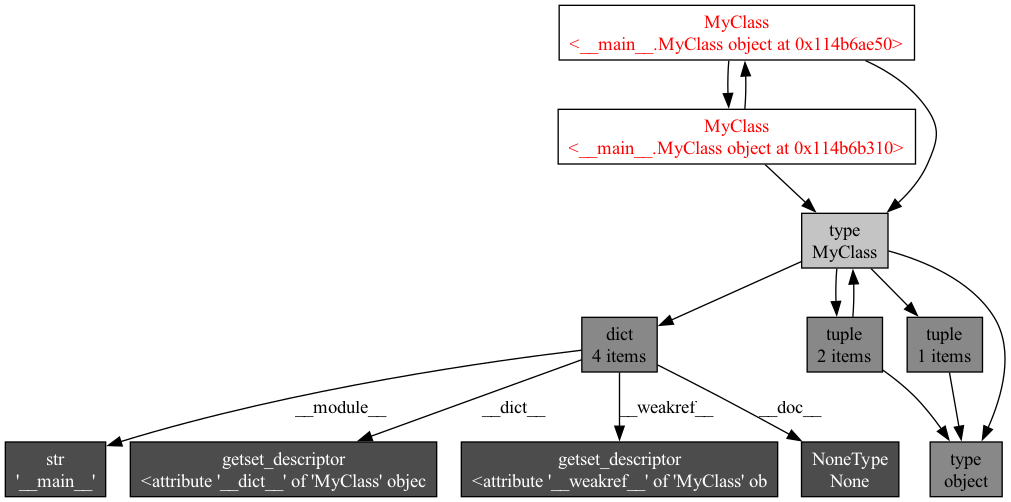

In [ ]:
import gc

import objgraph
from IPython.display import Image, display


# Example objects with references
class MyClass:
    pass


a = MyClass()  # An instance of MyClass
b = MyClass()  # Another instance of MyClass
a.ref = b  # 'a' references 'b'
b.ref = a  # 'b' references 'a', creating a circular reference

gc.collect()  # Force garbage collection

# Displaying unreachable objects
print("Uncollectable objects:", gc.garbage[:1])

# Show the reference graph for objects of type 'MyClass'
objgraph.show_refs([a, b], filename="../examples/sample-graph.png")
display(Image(filename="../examples/sample-graph.png"))

## 5. Introspection <a id="introspection"></a>

_Introspection_ is the ability of a program to examine and analyze its own structure, properties, and state. In Python, introspection is a powerful feature that allows you to inspect and manipulate objects at runtime, providing a high level of flexibility and control over the code.

- **Type Checking**: Using functions like `type()` and `isinstance()` to determine an object's type.
- **Attribute and Method Examination**: Functions such as `dir()`, `getattr()`, `hasattr()`, and `setattr()` allow examination and modification of an object's attributes and methods.
- **Callable Objects**: The `callable()` function checks if an object can be called like a function.
- **Inspecting Source Code**: The `inspect` module provides several functions to get information about live objects such as modules, classes, methods, functions, tracebacks, frame objects, and code objects.
- **Documentation Strings**: Accessing an object's documentation string (if any) via its `__doc__` attribute or using the built-in `help()` function.

In [ ]:
class MyClass:
    def __init__(self, value):
        self.value = value

    def display(self):
        print(f"Value: {self.value}")


obj = MyClass(10)

# Type checking
print(type(obj))  # Output: <class '__main__.MyClass'>

# Checking for attributes
print(hasattr(obj, "value"))  # Output: True
print(hasattr(obj, "display"))  # Output: True

# Getting attribute
print(getattr(obj, "value"))  # Output: 10

# Listing attributes and methods
print(dir(obj))

# Using the inspect module
import inspect

print(inspect.isclass(MyClass))  # Output: True
print(inspect.getmembers(obj, predicate=inspect.ismethod))

# Accessing documentation
print(obj.__doc__)

<class '__main__.MyClass'>
True
True
10
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'display', 'value']
True
[('__init__', <bound method MyClass.__init__ of <__main__.MyClass object at 0x104805150>>), ('display', <bound method MyClass.display of <__main__.MyClass object at 0x104805150>>)]
None
